# Project 7 project 7 Predictive Analytics w/SLR

**Author:** David Rodriguez-Mayorquin

[GitHub Repository](https://github.com/drodmay1/datafun-07-ml.git)



In [12]:

# Standard library imports
import os
import sys

# Third-party library imports
import numpy as np
import pandas as pd
import pyarrow
import matplotlib
import seaborn
import scipy


## Part 1 - Chart a Straight Line

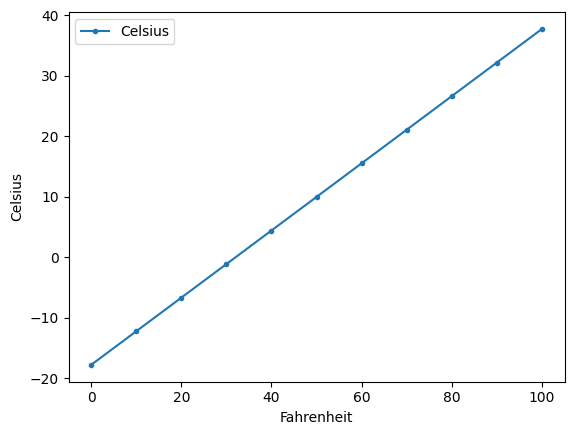

In [73]:
import pandas as pd

# Define the lambda function to convert Fahrenheit to Celsius
c = lambda f: 5 / 9 * (f - 32)

# Generate temperature data for Fahrenheit from 0 to 100 in steps of 10
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Create DataFrame from the list of tuples
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# Plot the data with a solid line and markers
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


## Part 2 - Predict Avg High Temp in NYC in January 

### Part 2 Section 1: Data Acquisition


In [85]:
# Read the CSV file 'ave_hi_nyc_jan_1895-2018.csv' into a DataFrame
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Part 2 Section 2: Data Inspection

In [86]:
# Display the first few rows of the DataFrame
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [87]:
# Display the last few rows of the DataFrame
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Part 2 Section 3: Data Cleaning

In [88]:
# Rename 'Value' column as 'Temperature'
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Display the first few rows of the DataFrame
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [90]:
# Check the column type Date

nyc_df.Date.dtype

dtype('int64')

In [91]:
# Rename 'Value' column as 'Temperature'
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Floor divide the 'Date' column of the DataFrame by 100, to truncate the last two digits
nyc_df.Date = nyc_df.Date.floordiv(100)

# Display the first 3 rows of the DataFrame
nyc_df.head(3)


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Part 2 Section 4: Descriptive Statistics

In [92]:
# Set the display precision for floating-point numbers to 2 decimal places
pd.set_option('display.precision', 2)

# Generate descriptive statistics for the 'Temperature' column of the DataFrame
nyc_df.Temperature.describe()


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Part 2 Section 5: Build the Model

In [93]:
from scipy import stats

# Perform linear regression on the 'Date' and 'Temperature' columns
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

# Access the slope and intercept values
slope = linear_regression.slope  # Slope of the linear regression line
intercept = linear_regression.intercept  # Intercept of the linear regression line

# Print the slope and intercept values
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.014771361132966163
Intercept: 8.694993233674289


### Part 2 Section 6: Predict

In [94]:
# Calculate the predicted temperature for the year 2024 using the linear regression equation:
# y = slope * x + intercept, where x is the year (2019 in this case)

linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

In [95]:
# Calculate the predicted temperature for the year 1890 using the linear regression equation:
# y = slope * x + intercept, where x is the year (1890 in this case)

linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

### Part 2 Section 7: Visualizations

(10.0, 70.0)

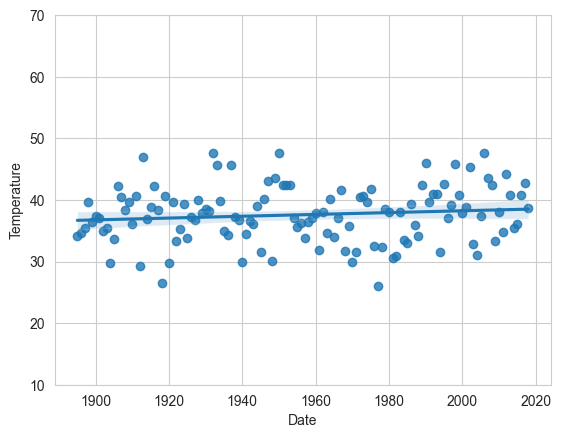

In [96]:
import seaborn as sns
sns.set_style('whitegrid')

axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

axes.set_ylim(10, 70)